**Amazon Product Reviews**

In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\charm\OneDrive\Desktop\Data Analytics\Project\archive\Reviews.csv")
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


**Data Cleaning Steps**

In [2]:
df.isnull().sum()             # Check missing values
df = df.dropna()              # Drop rows with missing values

df.duplicated().sum()         # Check duplicate rows
df = df.drop_duplicates()     # Remove duplicates


In [3]:
import re

def clean_text(text):
    text = str(text).lower()                       # Lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)     # Remove special characters
    return text

df['Cleaned_Text'] = df['Text'].apply(clean_text)


In [4]:
import re

def clean_text(text):
    text = str(text).lower()                      # Convert to lowercase
    text = re.sub(r'<.*?>', '', text)             # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)           # Remove punctuation
    text = re.sub(r'\d+', '', text)               # Remove numbers
    text = re.sub(r'\b(?:im|dont|ive|br)\b', '', text)  # Remove custom noisy words
    text = re.sub(r'\s+', ' ', text).strip()      # Remove extra whitespace
    return text

df['Cleaned_Text'] = df['Text'].apply(clean_text)


In [5]:
# Define a custom list of noisy/unwanted words
noisy_words = ["br", "im", "dont", "would", "one", "get", "also", "really", "even", "use", "much"]

# Function to remove those words from your Cleaned_Text column
def remove_noisy_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in noisy_words]
    return " ".join(filtered_words)

# Apply the function to your Cleaned_Text column
df['Cleaned_Text'] = df['Cleaned_Text'].apply(remove_noisy_words)


In [6]:
# Display original and cleaned text side by side for comparison
print(df[['Text', 'Cleaned_Text']].head(10))

                                                Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   
5  I got a wild hair for taffy and ordered this f...   
6  This saltwater taffy had great flavors and was...   
7  This taffy is so good.  It is very soft and ch...   
8  Right now I'm mostly just sprouting this so my...   
9  This is a very healthy dog food. Good for thei...   

                                        Cleaned_Text  
0  i have bought several of the vitality canned d...  
1  product arrived labeled as jumbo salted peanut...  
2  this is a confection that has been around a fe...  
3  if you are looking for the secret ingredient i...  
4  great taffy at a great price there was a wide ...  
5  i got a wild hair for taffy and ordered this f... 

**Sentiment Analysis Approach**
**Rule-based (VADER)**`

<Axes: xlabel='Sentiment'>

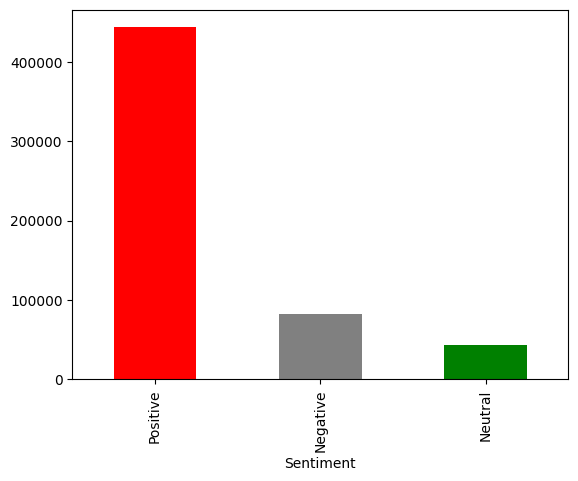

In [7]:
def get_sentiment(score):
    if score <= 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['Sentiment'] = df['Score'].apply(get_sentiment)

# Distribution count
df['Sentiment'].value_counts().plot(kind='bar', color=['red', 'gray', 'green'])


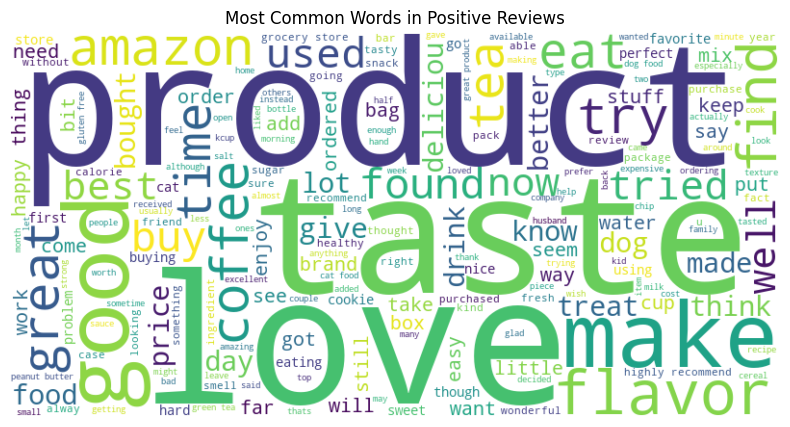

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all cleaned reviews (for a specific sentiment)
text = ' '.join(df[df['Sentiment'] == 'Positive']['Cleaned_Text'])

# Create and display word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Positive Reviews')
plt.show()


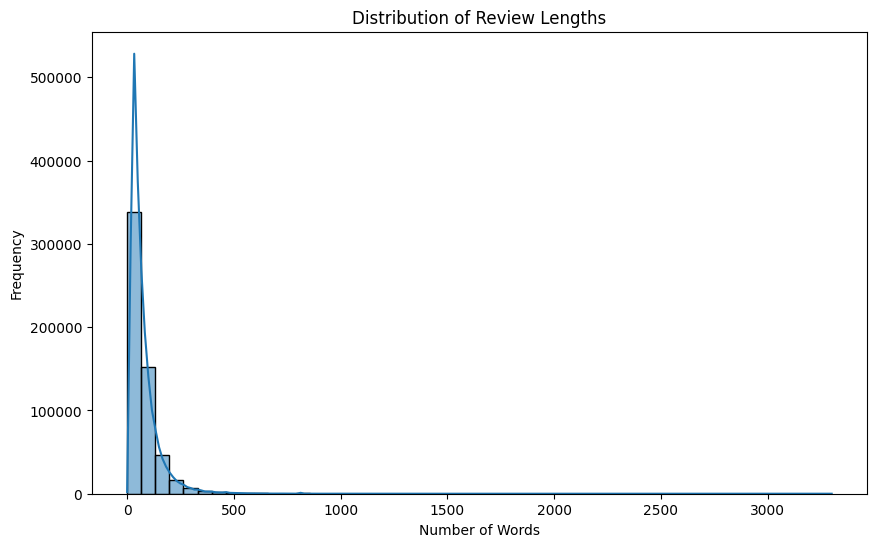

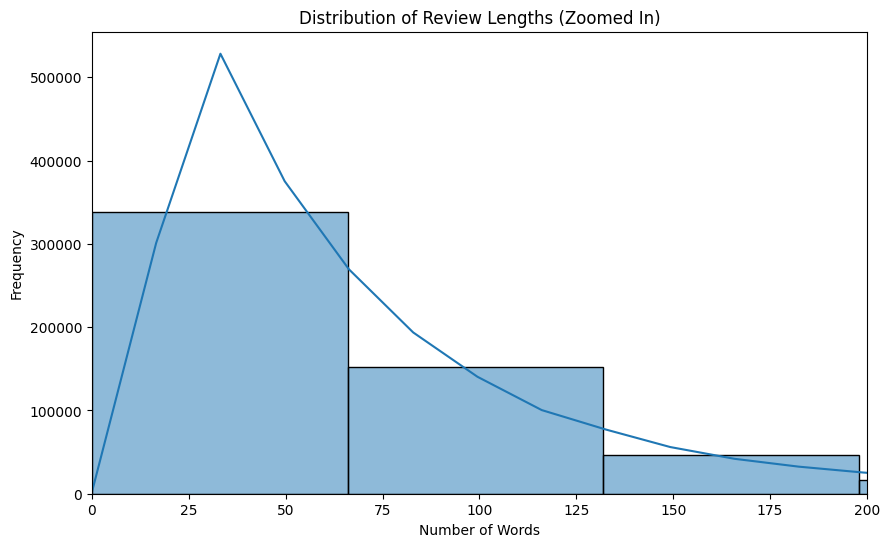

In [9]:
# Add a new column with review lengths
df['Review_Length'] = df['Cleaned_Text'].apply(lambda x: len(x.split()))

# Plot the distribution of review lengths
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Review_Length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df['Review_Length'], bins=50, kde=True)
plt.xlim(0, 200)  # limit x-axis
plt.title('Distribution of Review Lengths (Zoomed In)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()




In [10]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\charm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
sia = SentimentIntensityAnalyzer()

In [12]:
# Generate compound sentiment score for each review
df['VADER_Score'] = df['Cleaned_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [13]:
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Predicted_Sentiment'] = df['VADER_Score'].apply(classify_sentiment)

In [14]:

# Convert Unix timestamp to datetime
df['Date'] = pd.to_datetime(df['Time'], unit='s')

# Optional: Extract just the year/month if needed
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)



In [15]:
df[['Cleaned_Text', 'VADER_Score', 'Predicted_Sentiment']].head(10)

,Cleaned_Text,VADER_Score,Predicted_Sentiment
0,i have bought several of the vitality canned d...,0.9441,Positive
1,product arrived labeled as jumbo salted peanut...,-0.5664,Negative
2,this is a confection that has been around a fe...,0.8265,Positive
3,if you are looking for the secret ingredient i...,0.4404,Positive
4,great taffy at a great price there was a wide ...,0.9468,Positive
5,i got a wild hair for taffy and ordered this f...,0.8253,Positive
6,this saltwater taffy had great flavors and was...,0.9273,Positive
7,this taffy is so good it is very soft and chew...,0.9436,Positive
8,right now mostly just sprouting this so my cat...,0.6369,Positive
9,this is a very healthy dog food good for their...,0.8313,Positive


In [18]:
df.to_csv('Cleaned_Reviews.csv', index=False)
print("CSV file saved successfully!")


CSV file saved successfully!


**Visualizations**

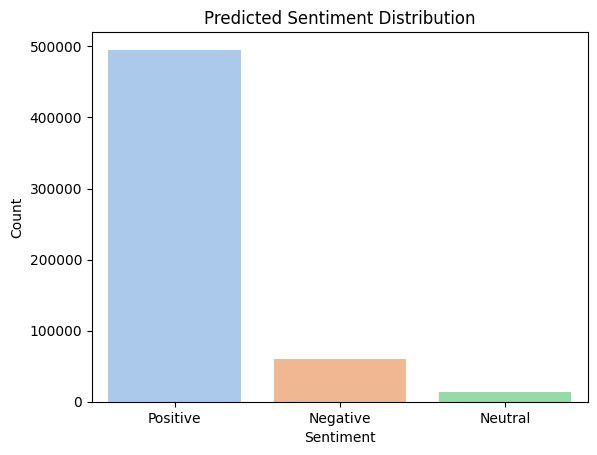

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Updated version — assigns 'Predicted_Sentiment' to both x and hue
sns.countplot(data=df, x='Predicted_Sentiment', hue='Predicted_Sentiment', palette='pastel', legend=False)

plt.title('Predicted Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


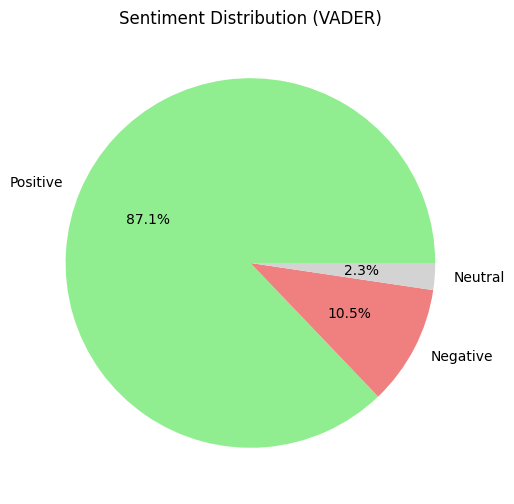

In [20]:
import matplotlib.pyplot as plt

# Count sentiment categories
sentiment_counts = df['Predicted_Sentiment'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightgray'])
plt.title('Sentiment Distribution (VADER)')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\charm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


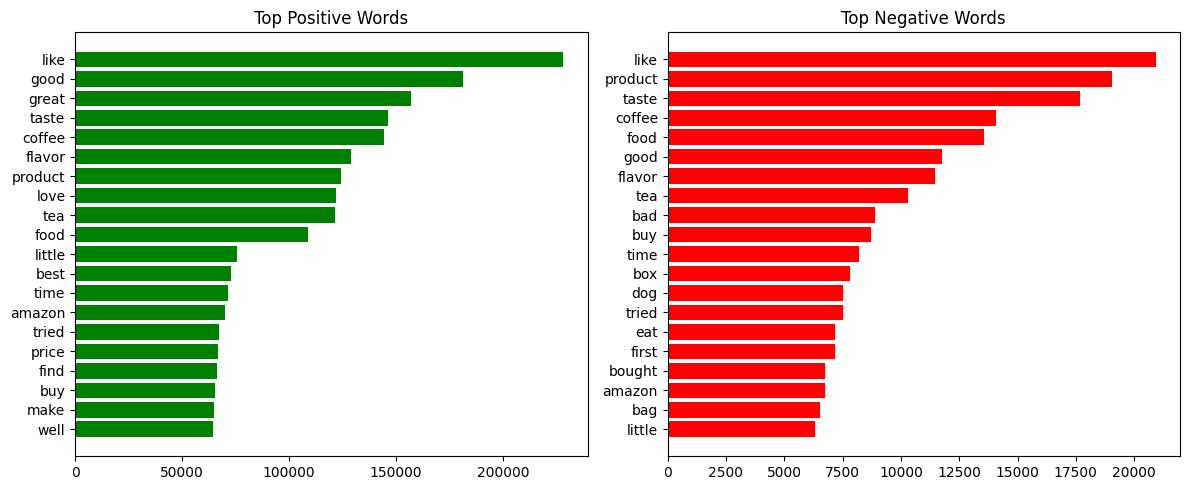

In [21]:
#Most Common Positive/Negative Words

from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Combine all words for Positive reviews
positive_words = ' '.join(df[df['Predicted_Sentiment'] == 'Positive']['Cleaned_Text']).split()
positive_words = [word for word in positive_words if word not in stop_words]

# Same for Negative
negative_words = ' '.join(df[df['Predicted_Sentiment'] == 'Negative']['Cleaned_Text']).split()
negative_words = [word for word in negative_words if word not in stop_words]

# Get top 20 words
top_pos = Counter(positive_words).most_common(20)
top_neg = Counter(negative_words).most_common(20)

# Plot bar chart
plt.figure(figsize=(12, 5))

# Positive
plt.subplot(1, 2, 1)
pos_words, pos_counts = zip(*top_pos)
plt.barh(pos_words, pos_counts, color='green')
plt.title('Top Positive Words')
plt.gca().invert_yaxis()

# Negative
plt.subplot(1, 2, 2)
neg_words, neg_counts = zip(*top_neg)
plt.barh(neg_words, neg_counts, color='red')
plt.title('Top Negative Words')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()
